In [2]:
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout


In [3]:
IMG_SIZE = 128  
BATCH_SIZE = 32

train_dir = 'dataset/train'
val_dir = 'dataset/validation'
test_dir = 'dataset/test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generator data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

for class_name, index in train_data.class_indices.items():
    print(f"index {index}: {class_name}")


Found 15200 images belonging to 19 classes.
Found 1900 images belonging to 19 classes.
Found 1900 images belonging to 19 classes.
index 0: apple
index 1: avocado
index 2: banana
index 3: broccoli
index 4: carrot
index 5: chicken
index 6: corn
index 7: dragon fruit
index 8: egg
index 9: grape
index 10: green vegetables
index 11: orange
index 12: porridge
index 13: potato
index 14: rice
index 15: tempeh
index 16: tofu
index 17: tomato
index 18: watermelon


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Arsitektur model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(19, activation='softmax') 
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary model
model.summary()


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 19)             │         2,451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,683 (1.62 MB)

 Trainable params: 424,723 (1.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [6]:
# Callback untuk early stopping, learning rate scheduler, dan model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [7]:
# Training model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.3903 - loss: 1.9376

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.66184, saving model to best_model.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 304s 628ms/step - accuracy: 0.3905 - loss: 1.9369 - val_accuracy: 0.4495 - val_loss: 1.6618 - learning_rate: 0.0010
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.6017 - loss: 1.1913
Epoch 2: val_loss improved from 1.66184 to 1.31339, saving model to best_model.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 299s 628ms/step - accuracy: 0.6018 - loss: 1.1912 - val_accuracy: 0.5979 - val_loss: 1.3134 - learning_rate: 0.0010
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.6659 - loss: 0.9971
Epoch 3: val_loss did not improve from 1.31339
475/475 ━━━━━━━━━━━━━━━━━━━━ 286s 602ms/step - accuracy: 0.6660 - loss: 0.9970 - val_accuracy: 0.5926 - val_loss: 1.3629 - learning_rate: 0.0010
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.7148 - loss: 0.8667
Epoch 4: val_loss improved from 1.31339 to 0.98430, saving model to best_model.keras
47

Test Accuracy: 0.95
Test Loss: 0.19
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step

Classification Report:
                  precision    recall  f1-score   support

           apple       1.00      0.96      0.98       100
         avocado       0.96      1.00      0.98       100
          banana       0.94      0.98      0.96       100
        broccoli       0.93      0.98      0.96       100
          carrot       0.99      0.98      0.98       100
         chicken       0.71      0.85      0.77       100
            corn       0.94      1.00      0.97       100
    dragon fruit       0.97      1.00      0.99       100
             egg       0.98      0.95      0.96       100
           grape       0.98      0.98      0.98       100
green vegetables       0.92      0.91      0.91       100
          orange       0.97      0.97      0.97       100
        porridge       0.97      0.89      0.93       100
          potato       0.99      0.96      0.97       100
            rice       0.95 

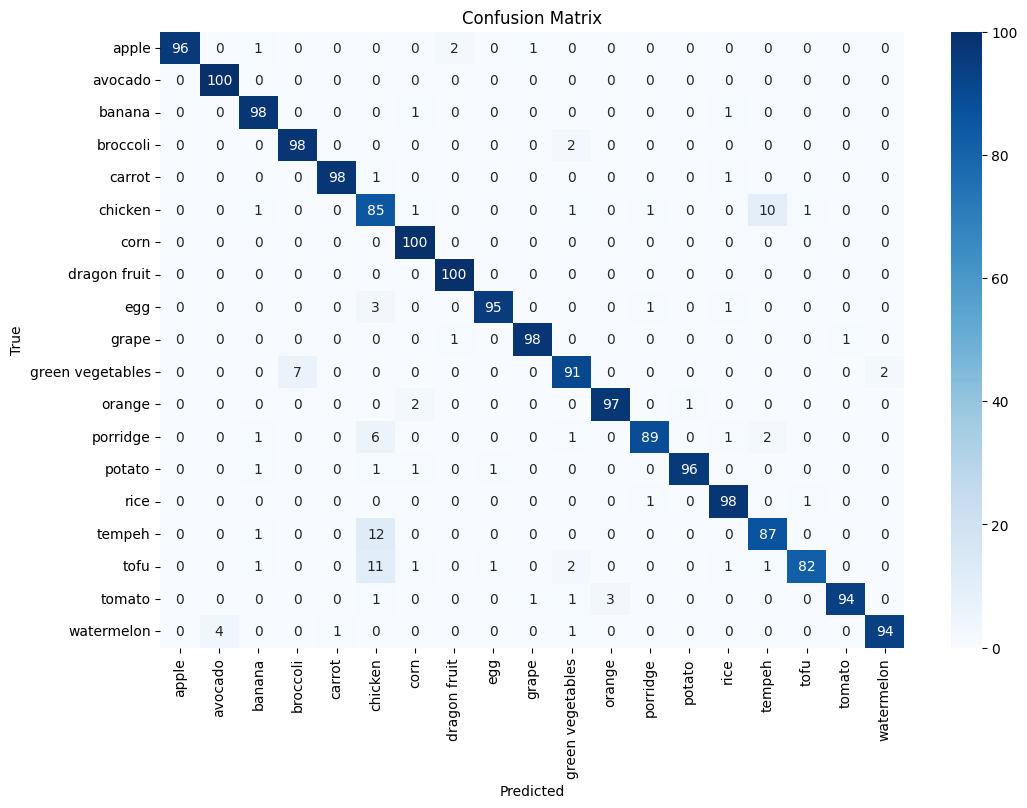

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Evaluasi model pada data testing
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Mendapatkan prediksi untuk data testing
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Prediksi kelas
y_true = test_data.classes  # Label sebenarnya dari data testing

# Menampilkan classification report
class_names = list(test_data.class_indices.keys())  # Nama kelas
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Menampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

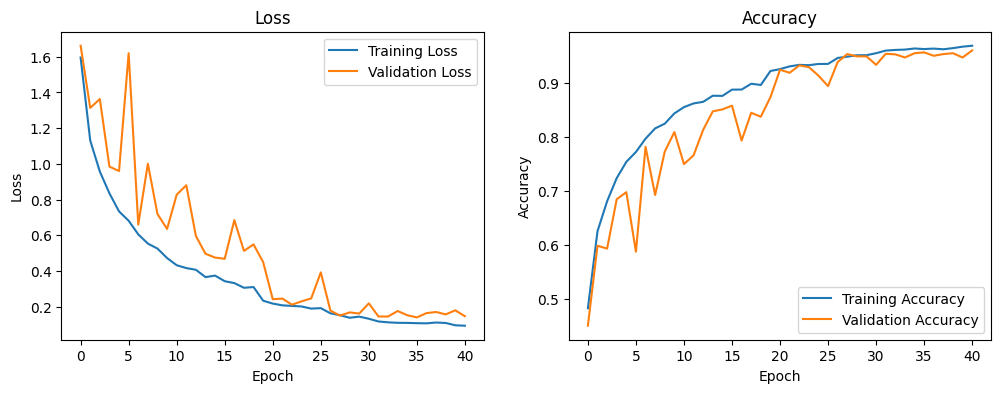

In [10]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = load_model("best_model.keras")
print("Model berhasil dimuat!")

def predict_image(image_path, model, class_indices):
    # Load dan preprocess gambar
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # resize ke 128x128
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Kelas dengan probabilitas tertinggi
    confidence = predictions[0][predicted_class] * 100

    # Mapping indeks ke nama kelas
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class]

    return predicted_label, confidence

# Path gambar baru
new_image_path = "test_images/25.jpg"

# Prediksi gambar baru
predicted_label, confidence = predict_image(new_image_path, model, train_data.class_indices)
print(f"Gambar diprediksi sebagai: {predicted_label} , confidence: {confidence:.2f}%")

Model berhasil dimuat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
Gambar diprediksi sebagai: watermelon , confidence: 100.00%


In [36]:
from tensorflow.keras.models import load_model

# Memuat model dari file .keras
model = load_model('best_model.keras')

# Menyimpan ulang model ke format .h5
model.save('model.h5')